In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# 데이터 불러오기(그림그리기 위해 label컬럼을 인덱스로)
tbl = pd.read_csv("../data/bmi.csv", index_col=2)

In [3]:
tbl.head()

,height,weight
label,,
normal,140,45
fat,145,72
fat,150,61
fat,137,56
thin,192,48


In [4]:
# 어떤 컬럼이 있는지 확인
# fat:지방, normal:표준, thin:얇은
tbl.index.unique()

Index(['normal', 'fat', 'thin'], dtype='object', name='label')

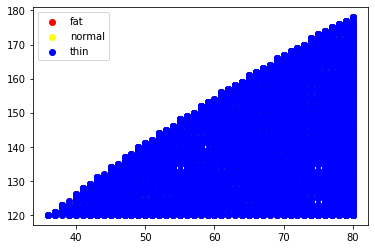

In [7]:
plt.scatter(tbl.loc['fat','weight'],tbl.loc['fat','height'], c='r',label='fat')
plt.scatter(tbl.loc['fat','weight'],tbl.loc['fat','height'], c='yellow',label='normal')
plt.scatter(tbl.loc['fat','weight'],tbl.loc['fat','height'], c='blue',label='thin')

plt.legend()

In [8]:
data =pd.read_csv("../data/bmi.csv")
data.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


In [9]:
data['label'].value_counts()

fat       7712
thin      6338
normal    5950
Name: label, dtype: int64

In [10]:
data.shape

(20000, 3)

In [11]:
#결측치도 없음
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  20000 non-null  int64 
 1   weight  20000 non-null  int64 
 2   label   20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


### 실습 1 iloc을 활용해 7:3으로 나누게하기

In [16]:
medium = int(20000 * 0.7)
train = data.iloc[:medium]
test = data.iloc[medium:]

In [17]:
print(train.shape)
print(test.shape)

(14000, 3)
(6000, 3)


### 실습 2 iloc을 활용해 X_train,y_train,X_test,y_test 나누게하기

In [18]:
X_train = train.iloc[:, 0:2]
Y_train = train.iloc[:, 2]
X_test = test.iloc[:, 0:2]
Y_test = test.iloc[:, 2]

In [19]:
X_train.shape, Y_train.shape

((14000, 2), (14000,))

In [20]:
X_test.shape, Y_test.shape

((6000, 2), (6000,))

### 실습 3 KNN 분류 알고리즘을 사용하여 모델 만들기(이웃의 수는 3)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model = KNeighborsClassifier(n_neighbors=3)

### 실습 4 fit을 이용해 학습시키게하기

In [23]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

### 실습 5 predict를 이용해 예측하게하기

In [24]:
pre = model.predict(X_test)
pre

array(['normal', 'thin', 'normal', ..., 'normal', 'normal', 'thin'],
      dtype=object)

### 실습 6 모델 평가하기 

In [26]:
import sklearn.metrics as metrics

In [27]:
ac_score = metrics.accuracy_score(pre, Y_test)
print("정확도:", ac_score)

정확도: 0.9976666666666667


### 실습 7 자신 정보를 분류 해보세요

In [29]:
model.predict([[170, 65]])

array(['normal'], dtype=object)